In [2328]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2329]:
df_house = pd.read_csv(".\data_zillow_house_prices.csv")
df_house

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adevr\AppData\Local\Temp\ipykernel_13984\3782765340.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_house = pd.read_csv(".\data_zillow_house_prices.csv")


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,...,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,127881.0,128227.0,128591.0,129332.0,130079.0,130824.0,131584.0,132394.0,133222.0,134055.0,134895.0,135756.0,136559.0,137298.0,138048.0,138850.0,139676.0,140486.0,141302.0,142147.0,142983.0,143824.0,144594.0,145330.0,146001.0,146702.0,147441.0,148223.0,149056.0,149933.0,150884.0,151877.0,152859.0,153846.0,154777.0,...,244473.0,245078.0,245632.0,246194.0,246830.0,247547.0,248286.0,249117.0,250107.0,251256.0,252549.0,253775.0,254627.0,255337.0,256441.0,258367.0,260889.0,263723.0,266764.0,269823.0,273072.0,276446.0,280122.0,284002.0,288735.0,294292.0,300206.0,305630.0,310279.0,314397.0,318303.0,322658.0,327381.0,332588.0,337848.0,343392.0,348415.0,352585.0,354986.0,356026.0
1,394913,1,"New York, NY",msa,NY,224676.0,226018.0,227226.0,229604.0,231817.0,234174.0,236651.0,239214.0,241786.0,244330.0,246775.0,249065.0,251269.0,253694.0,256065.0,258541.0,260888.0,263425.0,265893.0,268563.0,271267.0,274250.0,276997.0,279648.0,282325.0,284933.0,287473.0,289923.0,292513.0,295452.0,298616.0,302526.0,306619.0,310708.0,314333.0,...,481021.0,481219.0,481188.0,480915.0,480449.0,479912.0,479617.0,480155.0,481185.0,482663.0,484082.0,485575.0,486385.0,486942.0,488159.0,490750.0,495258.0,500749.0,506781.0,512611.0,517458.0,522204.0,526577.0,531325.0,536845.0,544022.0,551965.0,559572.0,565484.0,570041.0,573600.0,576842.0,580804.0,585445.0,591876.0,599008.0,606525.0,612535.0,616856.0,619142.0
2,753899,2,"Los Angeles, CA",msa,CA,227786.0,228579.0,229794.0,232104.0,234580.0,236919.0,239314.0,241827.0,244221.0,246410.0,248437.0,250571.0,252211.0,253988.0,255882.0,258521.0,261110.0,263497.0,265939.0,268484.0,271124.0,273741.0,276021.0,278419.0,280397.0,282728.0,285504.0,289036.0,293052.0,297150.0,302307.0,307679.0,313147.0,318030.0,322878.0,...,652996.0,653999.0,653077.0,653792.0,656465.0,660702.0,662685.0,664469.0,667401.0,673408.0,680267.0,685315.0,683433.0,680576.0,682292.0,691328.0,701786.0,711604.0,718983.0,725225.0,730285.0,737665.0,745419.0,756302.0,771738.0,791254.0,811848.0,825095.0,834073.0,838762.0,845860.0,855023.0,865646.0,877802.0,895038.0,914016.0,930381.0,931707.0,928599.0,914636.0
3,394463,3,"Chicago, IL",msa,IL,170004.0,170405.0,170924.0,171963.0,173064.0,174155.0,175363.0,176717.0,178116.0,179493.0,180744.0,181967.0,183112.0,184126.0,185275.0,186405.0,187797.0,189084.0,190385.0,191702.0,193031.0,194453.0,195632.0,196699.0,197609.0,198669.0,199948.0,201022.0,202225.0,203327.0,204804.0,206312.0,207772.0,209112.0,210073.0,...,241622.0,241550.0,241510.0,241441.0,241437.0,241330.0,241337.0,241550.0,242030.0,242638.0,243167.0,243294.0,243127.0,243097.0,244108.0,245771.0,248653.0,251507.0,254307.0,256530.0,258060.0,260382.0,262494.0,265534.0,268285.0,272104.0,276268.0,280383.0,283454.0,286113.0,288807.0,291527.0,294162.0,296729.0,300023.0,303490.0,307454.0,310438.0,312286.0,312609.0
4,394514,4,"Dallas, TX",msa,TX,129921.0,130025.0,130112.0,130323.0,130544.0,130729.0,130927.0,131293.0,131747.0,132276.0,132759.0,133251.0,133462.0,133142.0,132861.0,132743.0,132961.0,133027.0,133099.0,133392.0,133619.0,133821.0,133870.0,134016.0,134157.0,134451.0,1

In [2330]:
df_rates = pd.read_csv(".\data_interest_rates.csv")
df_rates

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adevr\AppData\Local\Temp\ipykernel_13984\3220168093.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_rates = pd.read_csv(".\data_interest_rates.csv")


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2680,2022-08-11,5.22
2681,2022-08-18,5.13
2682,2022-08-25,5.55
2683,2022-09-01,5.66


In [2331]:
boston_arr = (df_house[df_house["RegionName"] == "Boston, MA"]).squeeze()
boston_arr = boston_arr.iloc[6:]
boston_arr.index = pd.to_datetime(boston_arr.index)
boston_arr

2000-02-29    233010.0
2000-03-31    234265.0
2000-04-30    236467.0
2000-05-31    238657.0
2000-06-30    241004.0
                ...   
2022-04-30    643355.0
2022-05-31    651279.0
2022-06-30    656882.0
2022-07-31    658173.0
2022-08-31    657035.0
Name: 11, Length: 271, dtype: object

<Axes: >

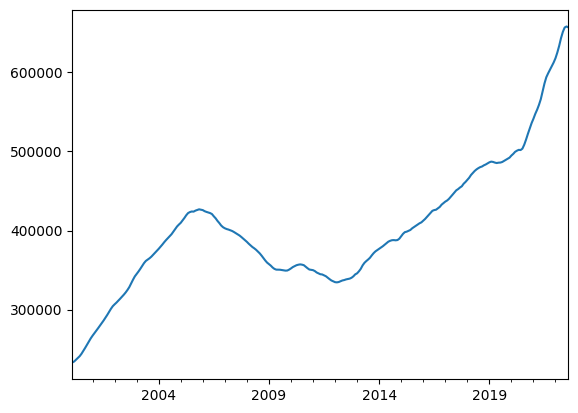

In [2332]:
boston_arr.plot()

In [2333]:
boston_slice = boston_arr["2010-01-01":"2017-12-31"]
boston_slice

2010-01-31    352001.0
2010-02-28    353713.0
2010-03-31    354899.0
2010-04-30    356066.0
2010-05-31    356716.0
                ...   
2017-08-31    452393.0
2017-09-30    454372.0
2017-10-31    455955.0
2017-11-30    459183.0
2017-12-31    461409.0
Name: 11, Length: 96, dtype: object

In [2334]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(boston_slice, regression="ct")

# Output the results
print('ADF Statistic:', result[0])
print('p-value:', np.round(result[1], 3))
print('Number of lags used:', result[2])
print('Number of observations used:', result[3])
print('Critical Values:', result[4])

ADF Statistic: -3.9032704282470343
p-value: 0.012
Number of lags used: 4
Number of observations used: 91
Critical Values: {'1%': -4.061865559807901, '5%': -3.4598875383872256, '10%': -3.155966861981154}


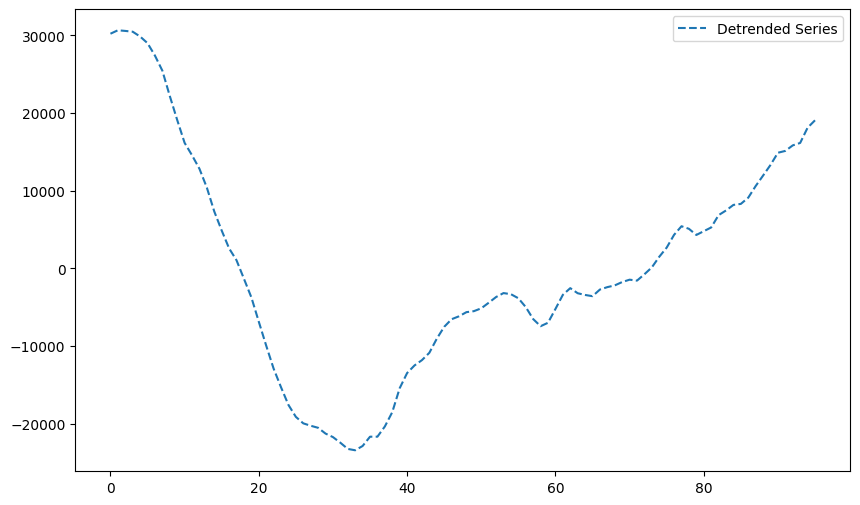

In [2335]:
import scipy.signal
import matplotlib.pyplot as plt

# Remove linear trend using scipy's detrend function
detrended_series = scipy.signal.detrend(boston_slice)

# Plot the original and detrended series
plt.figure(figsize=(10,6))
# plt.plot(boston_slice, label='Original Series')
plt.plot(detrended_series, label='Detrended Series', linestyle='--')
plt.legend()
plt.show()

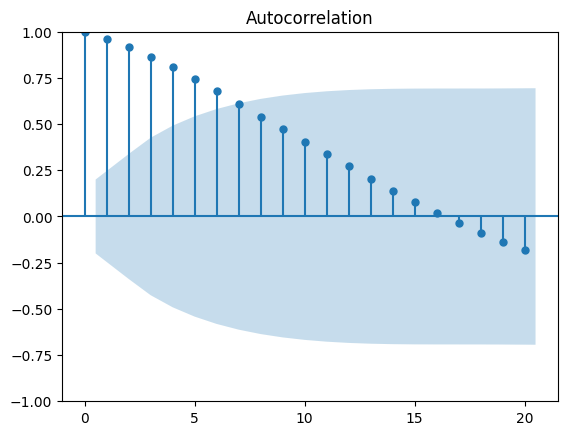

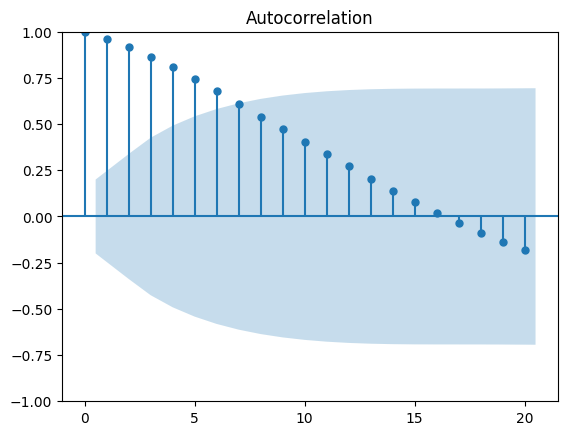

In [2336]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(detrended_series)

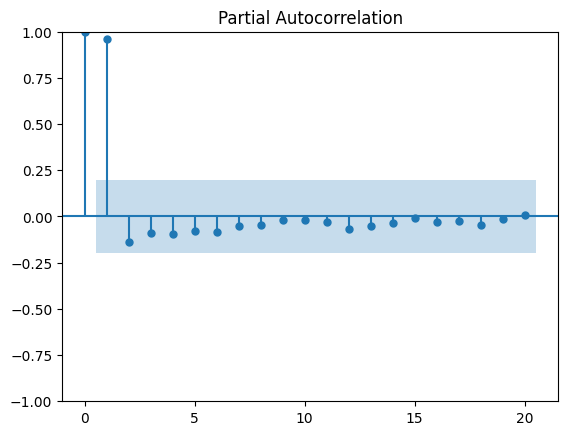

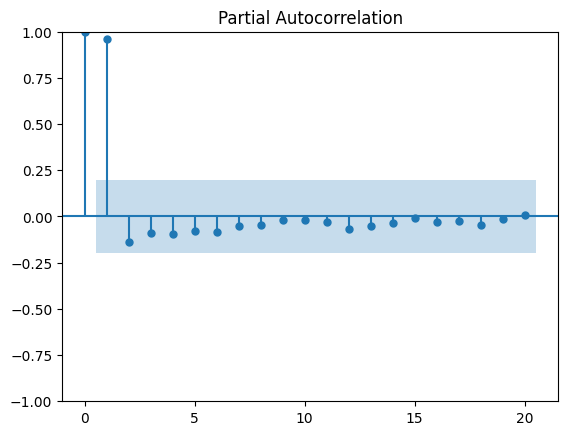

In [2337]:
plot_pacf(detrended_series)

_______________

In [2338]:
train = boston_slice.to_numpy().astype(float)
train

array([352001., 353713., 354899., 356066., 356716., 357129., 356795.,
       356125., 354136., 352315., 350636., 350304., 349837., 348675.,
       346875., 345693., 344661., 344398., 343288., 342164., 340304.,
       338485., 336798., 335661., 334657., 334386., 334821., 335780.,
       336786., 337311., 338127., 338671., 339142., 340236., 342055.,
       344523., 345795., 348378., 351491., 355845., 359064., 361313.,
       363265., 365480., 368559., 371360., 373611., 375259., 377058.,
       378455., 380091., 382074., 384085., 385860., 386985., 387732.,
       387864., 387590., 387939., 389653., 392695., 395785., 397917.,
       398531., 399579., 400689., 402814., 404393., 405885., 407586.,
       409159., 410308., 412396., 414549., 417185., 419633., 422551.,
       424924., 425863., 426340., 428093., 429842., 432699., 434567.,
       436553., 437953., 440024., 442791., 445409., 448045., 450885.,
       452393., 454372., 455955., 459183., 461409.])

In [2339]:
test = boston_arr["2018-01-01":"2019-12-31"]
test.head()

2018-01-31    464123.0
2018-02-28    466719.0
2018-03-31    470227.0
2018-04-30    472858.0
2018-05-31    475336.0
Name: 11, dtype: object

In [2340]:
from statsmodels.tsa.ar_model import AutoReg

p = 5
res = AutoReg(train, lags=p, trend="ct").fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                     AutoReg(5)   Log Likelihood                -701.831
Method:               Conditional MLE   S.D. of innovations            541.039
Date:                Tue, 22 Oct 2024   AIC                           1419.662
Time:                        09:51:44   BIC                           1439.749
Sample:                             5   HQIC                          1427.766
                                   96                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5781.6635   1465.892      3.944      0.000    2908.569    8654.759
trend         34.6587      7.480      4.634      0.000      19.999      49.318
y.L1           1.8215      0.092     19.776      0.000       1.641       2.002
y.L2          -0.7910      0.192     -4.125      0.000      -1.167      -0.415
y.L3          -0.6297      0.212     -2.969      0.003      -1.045      -0.214
y.L4           1.0506      0.195      5.377      0.000       0.668       1.434
y.L5          -0.4705      0.090     -5.256      0.000      -0.646      -0.295
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1897           -0.0000j            1.1897           -0.5000
AR.2            0.6261           -1.0560j            1.2277           -0.1648
AR.3            0.6261           +1.0560j            1.2277            0.1648
AR.4            1.0853           -0.0864j            1.0887           -0.0126
AR.5            1.0853           +0.0864j            1.0887            0.0126
-----------------------------------------------------------------------------
"""

p=1 : MSE=1.2

p=2 : MSE=0.4

p=3 : MSE=0.4

p=4 : MSE=0.4

p=4 : MSE=0.3

In [2341]:
MSE_dict = {}
for p in [1, 2, 3, 4, 5]:
    res = AutoReg(train, lags=p, trend="ct").fit()
    MSE = (res.resid**2).sum() / len(train) / 10**6
    MSE_dict[p] = MSE

MSE_dict

{1: 1.1815135004442356,
 2: 0.38798065765300316,
 3: 0.38290128013326163,
 4: 0.36626147802419573,
 5: 0.27747759408851436}

In [2342]:
p = 2
trend="ct"
res = AutoReg(train, lags=p, trend=trend).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                     AutoReg(2)   Log Likelihood                -739.199
Method:               Conditional MLE   S.D. of innovations            629.472
Date:                Tue, 22 Oct 2024   AIC                           1488.398
Time:                        09:51:44   BIC                           1501.115
Sample:                             2   HQIC                          1493.535
                                   96                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4059.3360   1491.870      2.721      0.007    1135.325    6983.347
trend         25.9208      6.973      3.717      0.000      12.253      39.588
y.L1           1.7525      0.059     29.648      0.000       1.637       1.868
y.L2          -0.7658      0.058    -13.148      0.000      -0.880      -0.652
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0854           +0.0000j            1.0854            0.0000
AR.2            1.2031           +0.0000j            1.2031            0.0000
-----------------------------------------------------------------------------
"""

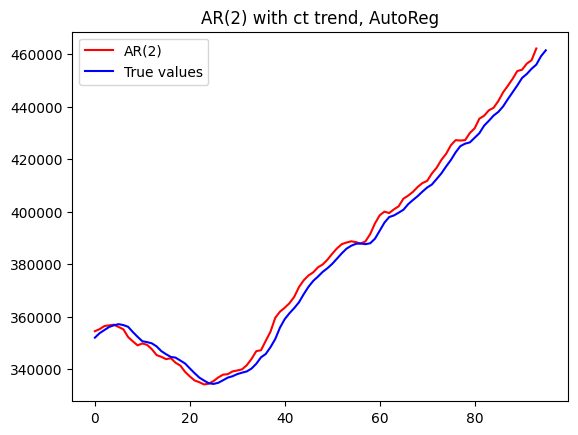

In [2343]:
plt.plot(res.fittedvalues, c="r", label="AR(2)")
plt.plot(train, c="b", label="True values")
plt.title(f"AR(2) with {trend} trend, AutoReg")
plt.legend()

In [2344]:
from statsmodels.tsa.arima.model import ARIMA

p = 2
trend = "ct"
res = ARIMA(train, order=[p, 0, 0], trend=trend).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -764.160
Date:                Tue, 22 Oct 2024   AIC                           1538.320
Time:                        09:51:44   BIC                           1551.142
Sample:                             0   HQIC                          1543.503
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.205e+05   1.05e+04     30.655      0.000       3e+05    3.41e+05
x1          1349.8698    191.129      7.063      0.000     975.264    1724.476
ar.L1          1.8848      0.047     40.526      0.000       1.794       1.976
ar.L2         -0.8927      0.046    -19.597      0.000      -0.982      -0.803
sigma2       4.42e+05      7e+04      6.318      0.000    3.05e+05    5.79e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.82   Prob(JB):                         0.60
Heteroskedasticity (H):               1.40   Skew:                             0.23
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2345]:
params = res.params[:-1]
params

array([320515.0497,   1349.8698,      1.8848,     -0.8927])

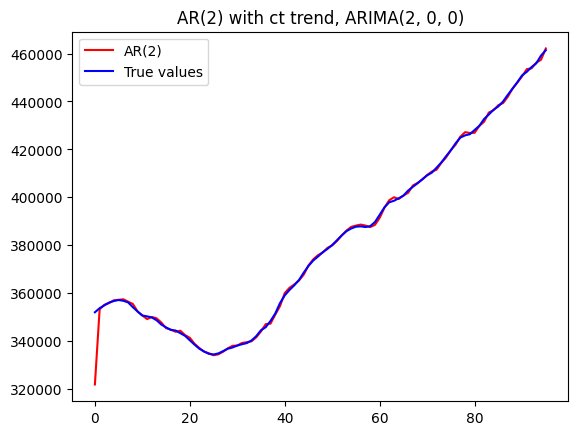

In [2346]:
plt.plot(res.fittedvalues, c="r", label="AR(2)")
plt.plot(train, c="b", label="True values")
plt.title(f"AR(2) with {trend} trend, ARIMA(2, 0, 0)")
plt.legend()

In [2347]:
(res.resid**2).mean() / 1000

9888.191713730077

In [2348]:
test = test.astype(float)
# test.index = test.index.to_period('M')
test

2018-01-31    464123.0
2018-02-28    466719.0
2018-03-31    470227.0
2018-04-30    472858.0
2018-05-31    475336.0
2018-06-30    477316.0
2018-07-31    478886.0
2018-08-31    480190.0
2018-09-30    480991.0
2018-10-31    482472.0
2018-11-30    483526.0
2018-12-31    484936.0
2019-01-31    486288.0
2019-02-28    487146.0
2019-03-31    486783.0
2019-04-30    485946.0
2019-05-31    485379.0
2019-06-30    485838.0
2019-07-31    485973.0
2019-08-31    486692.0
2019-09-30    488060.0
2019-10-31    489468.0
2019-11-30    490736.0
2019-12-31    492230.0
Name: 11, dtype: float64

In [2349]:
res.forecast(3)

array([463451.5569, 465324.8844, 467043.0085])

In [2350]:
start = 0
end = len(test)
fc = pd.Series(res.forecast(steps=end), index=test.index)
fc

2018-01-31    463451.556945
2018-02-28    465324.884433
2018-03-31    467043.008478
2018-04-30    468619.676738
2018-05-31    470068.279696
2018-06-30    471401.783118
2018-07-31    472632.671121
2018-08-31    473772.899164
2018-09-30    474833.856260
2018-10-31    475826.335726
2018-11-30    476760.513784
2018-12-31    477645.935332
2019-01-31    478491.506244
2019-02-28    479305.491540
2019-03-31    480095.518824
2019-04-30    480868.586394
2019-05-31    481631.075457
2019-06-30    482388.765906
2019-07-31    483146.855171
2019-08-31    483909.979635
2019-09-30    484682.238204
2019-10-31    485467.217588
2019-11-30    486268.018917
2019-12-31    487087.285343
dtype: float64

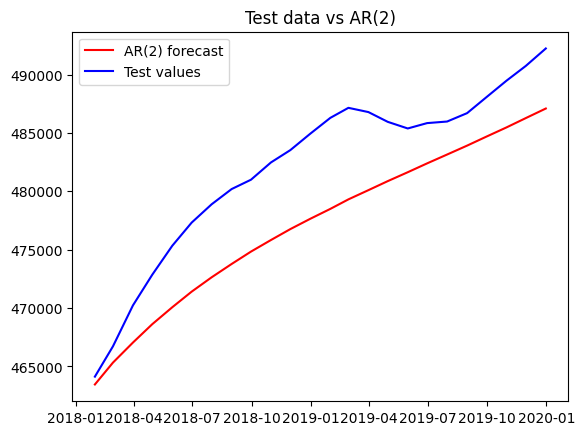

In [2351]:
plt.plot(fc, label="AR(2) forecast", c="r")
plt.plot(test, label="Test values", c="b")
plt.title("Test data vs AR(2)")
plt.legend()

In [2352]:
# MSE of may 2018
(fc[2] - test[2])**2 / 1000

C:\Users\adevr\AppData\Local\Temp\ipykernel_13984\1278309784.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (fc[2] - test[2])**2 / 1000


10137.802013533015

In [2353]:
((fc - test)**2).mean() / 1000

27614.835586373003

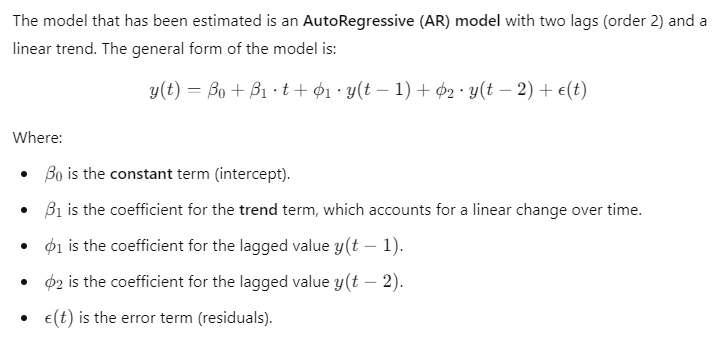

In [2354]:
def predict_y_t(params, y_lags_arr):
    return params[0] + y_lags_arr @ params[1:]

params = res.params
params

array([320515.0497,   1349.8698,      1.8848,     -0.8927, 442033.7898])

In [2355]:
np.set_printoptions(precision=4, suppress=True)

___________

In [2356]:
train_start = boston_slice.index[0]
train_end = boston_slice.index[-1]

test_start = test.index[0]
test_end = test.index[-1]

rates = pd.read_csv(r".\data_interest_rates.csv")
rates.set_index(pd.to_datetime(rates["DATE"]), inplace=True)
rates = rates.iloc[:, -1] / 100
rates

DATE
1971-04-02    0.0733
1971-04-09    0.0731
1971-04-16    0.0731
1971-04-23    0.0731
1971-04-30    0.0729
               ...  
2022-08-11    0.0522
2022-08-18    0.0513
2022-08-25    0.0555
2022-09-01    0.0566
2022-09-08    0.0589
Name: MORTGAGE30US, Length: 2685, dtype: float64

In [2357]:
rates_train = rates.loc[train_start:train_end].resample("M").last()
rates_test = rates.loc[test_start:test_end].resample("M").last()
rates_train

C:\Users\adevr\AppData\Local\Temp\ipykernel_13984\3426606801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rates_train = rates.loc[train_start:train_end].resample("M").last()
C:\Users\adevr\AppData\Local\Temp\ipykernel_13984\3426606801.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rates_test = rates.loc[test_start:test_end].resample("M").last()


DATE
2010-02-28    0.0505
2010-03-31    0.0499
2010-04-30    0.0506
2010-05-31    0.0478
2010-06-30    0.0469
               ...  
2017-08-31    0.0382
2017-09-30    0.0383
2017-10-31    0.0394
2017-11-30    0.0390
2017-12-31    0.0399
Freq: ME, Name: MORTGAGE30US, Length: 95, dtype: float64

In [2358]:
mse_dict_train = {}
mse_dict_test = {}
for p in [1, 2, 3, 4, 5]:
    for q in [1, 5, 10]:
        model_ARX = ARIMA(endog=train[1:], exog=rates_train, order=(p, 0, q), trend="ct").fit()
        mse = (model_ARX.resid**2).mean()
        mse_dict_train[(p, q)] = mse / 1000
        mse_dict_test[(p, q)] = ((model_ARX.forecast(steps=len(rates_test), exog=rates_test) - test[1:])**2).mean() / 1000
mse_dict_train

c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

{(1, 1): 19600.150771154884,
 (1, 5): 18763.64578366895,
 (1, 10): 18700.96949163734,
 (2, 1): 19092.181198464237,
 (2, 5): 18367.444227989086,
 (2, 10): 18240.738297576372,
 (3, 1): 19092.05779178164,
 (3, 5): 18672.488348169845,
 (3, 10): 17103.684751971326,
 (4, 1): 18712.475040705027,
 (4, 5): 17750.934211662836,
 (4, 10): 17833.79832729748,
 (5, 1): 18652.212635997465,
 (5, 5): 17383.110714268365,
 (5, 10): 17294.516986559356}

In [2359]:
mse_dict_test

{(1, 1): 82119.93334145923,
 (1, 5): 84283.37866912203,
 (1, 10): 94856.97945548467,
 (2, 1): 64042.48192932688,
 (2, 5): 78527.6038171797,
 (2, 10): 93901.43808594758,
 (3, 1): 64147.06926667461,
 (3, 5): 108399.18871359539,
 (3, 10): 88352.4516032012,
 (4, 1): 88152.40984739638,
 (4, 5): 107912.83784953426,
 (4, 10): 89296.96033059742,
 (5, 1): 84614.97648119235,
 (5, 5): 99130.76567924887,
 (5, 10): 70428.26450806332}

In [2360]:
mse_dict = {}
for p in [1, 2, 3, 4, 5]:
    model_ARX = ARIMA(endog=train[1:], exog=rates_train, order=(p, 0, 0)).fit()
    mse = (model_ARX.resid**2).mean()
    mse_dict[p] = mse
mse_dict

c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting auto

{1: 19793519.074199565,
 2: 17931514.819371533,
 3: 17732580.928383224,
 4: 17212057.944311213,
 5: 17166154.21590355}

In [2361]:
p = 1
model_ARX = ARIMA(endog=train[1:], exog=rates_train, order=(p, 0, 0)).fit()
model_ARX.summary()

c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   95
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -934.641
Date:                Tue, 22 Oct 2024   AIC                           1877.282
Time:                        09:52:38   BIC                           1887.497
Sample:                    02-28-2010   HQIC                          1881.410
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.775e+05   1.51e+05      3.161      0.002    1.81e+05    7.74e+05
MORTGAGE30US  -2.35e+06    1.4e+05    -16.774      0.000   -2.62e+06   -2.08e+06
ar.L1            0.9963      0.007    149.259      0.000       0.983       1.009
sigma2        1.917e+07   7644.072   2507.249      0.000    1.92e+07    1.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   8.16   Jarque-Bera (JB):                51.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             1.14
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.49e+19. Standard errors may be unstable.
"""

In [2362]:
p = 1
model_ARX = ARIMA(endog=test[1:], exog=rates_test, order=(p, 0, 0)).fit()
model_ARX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     11   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -209.879
Date:                Tue, 22 Oct 2024   AIC                            427.757
Time:                        09:52:38   BIC                            432.299
Sample:                    02-28-2018   HQIC                           428.899
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.225e+05   1.51e+04     34.554      0.000    4.93e+05    5.52e+05
MORTGAGE30US  -9.38e+05   3.13e+05     -2.996      0.003   -1.55e+06   -3.24e+05
ar.L1            0.9731      0.073     13.274      0.000       0.829       1.117
sigma2        4.346e+06   1.62e+04    268.309      0.000    4.31e+06    4.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.20   Prob(JB):                         0.50
Heteroskedasticity (H):               0.48   Skew:                            -0.50
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+18. Standard errors may be unstable.
"""